## M3: Time Series Decomposition Assignment - William Stencel

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
df_const = pd.read_csv('C:\\Grad\Competing Through Business Analytics\\M3\\ConstructionTimeSeriesDataV2.csv')
#df_const = pd.read_csv('C:\\Grad\Competing Through Business Analytics\\M3\\ConstructionTimeSeriesDataMnth.csv')

df_const['Month-Year'] = [x.replace("-", "-1-20") for x in df_const['Month-Year']]; df_const['Month-Year']

0      Jan-1-2002
1      Feb-1-2002
2      Mar-1-2002
3      Apr-1-2002
4      May-1-2002
5      Jun-1-2002
6      Jul-1-2002
7      Aug-1-2002
8      Sep-1-2002
9      Oct-1-2002
10     Nov-1-2002
11     Dec-1-2002
12     Jan-1-2003
13     Feb-1-2003
14     Mar-1-2003
15     Apr-1-2003
16     May-1-2003
17     Jun-1-2003
18     Jul-1-2003
19     Aug-1-2003
20     Sep-1-2003
21     Oct-1-2003
22     Nov-1-2003
23     Dec-1-2003
24     Jan-1-2004
25     Feb-1-2004
26     Mar-1-2004
27     Apr-1-2004
28     May-1-2004
29     Jun-1-2004
          ...    
116    Sep-1-2011
117    Oct-1-2011
118    Nov-1-2011
119    Dec-1-2011
120    Jan-1-2012
121    Feb-1-2012
122    Mar-1-2012
123    Apr-1-2012
124    May-1-2012
125    Jun-1-2012
126    Jul-1-2012
127    Aug-1-2012
128    Sep-1-2012
129    Oct-1-2012
130    Nov-1-2012
131    Dec-1-2012
132    Jan-1-2013
133    Feb-1-2013
134    Mar-1-2013
135    Apr-1-2013
136    May-1-2013
137    Jun-1-2013
138    Jul-1-2013
139    Aug-1-2013
140    Sep

In [3]:
df_const.head()

Month  Month-Year  Total Construction  Private Construction  \
0      1  Jan-1-2002               59516                 45273   
1      2  Feb-1-2002               58588                 44475   
2      3  Mar-1-2002               63782                 49396   
3      4  Apr-1-2002               69504                 53283   
4      5  May-1-2002               73384                 55009   

   Public Construction  
0                14243  
1                14113  
2                14386  
3                16221  
4                18375

# Private Construction

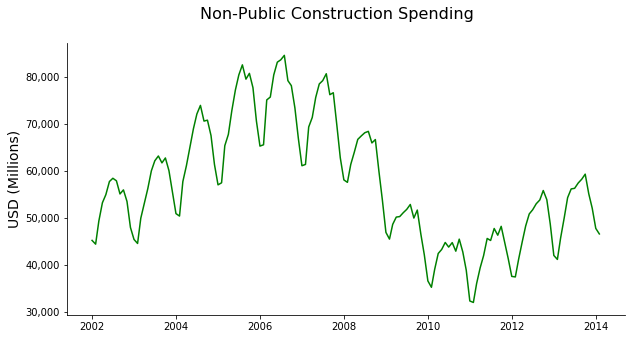

In [14]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(df_const['Month-Year']), df_const['Private Construction'], color='green')
ax.yaxis.set_label_text('USD (Millions)', fontsize='14')
fig.suptitle("Non-Public Construction Spending", fontsize='16')
fig.set_size_inches(10,5)
#ax.grid(True)
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### In the chart above, a long term nonlinear trend is present as well as strong seasonality.

C:\Users\ws0140\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  import sys


Average Squared Error per Month:  37395667.05489795
            Month  Month-Year  Total Construction  Private Construction  \
2003-07-31     19  Jul-1-2003               82971                 62216   
2003-08-31     20  Aug-1-2003               85191                 63234   
2003-09-30     21  Sep-1-2003               83841                 61767   
2003-10-31     22  Oct-1-2003               83133                 62813   
2003-11-30     23  Nov-1-2003               77915                 60115   
2003-12-31     24  Dec-1-2003               71050                 55584   
2004-01-31     25  Jan-1-2004               64934                 50975   
2004-02-29     26  Feb-1-2004               64138                 50449   
2004-03-31     27  Mar-1-2004               73238                 57796   
2004-04-30     28  Apr-1-2004               78354                 61177   
2004-05-31     29  May-1-2004               83736                 65027   
2004-06-30     30  Jun-1-2004               8993

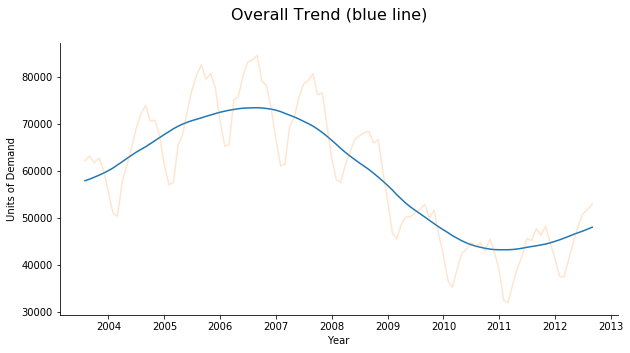

In [15]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2
    
df_const['MovAvg'] = np.NaN
df_const['sqErr'] = np.NaN
# Chaging the DataFrame index to DatetimeIndex data type is required for using one of the functions below
df_const.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=1), periods = len(df_const['Private Construction']))
#print(len(data),'\n',data)

window = 36

window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is eing computed
for i in range(int(window/2),df_const.shape[0]-int(window/2)):
    df_const.loc[df_const.index[i],'MovAvg'] = (0.5*df_const.iloc[i - int(window/2)]['Private Construction'] + df_const.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df_const.iloc[i + int(window/2)]['Private Construction'])/float(window)

df_const['sqErr'] = (df_const['Private Construction'] - df_const['MovAvg'])**2
# The squared error can eb computed also with the dfHA.apply() method below
# Using dfHS.apply() in this case is unecessary complexity, but it is a good function to know about
#dfHS['sqErr'] = dfHS.apply(sqErr,axis='columns')

# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df_const.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ax.plot(df_const['MovAvg'],label='Moving Avg.')
ax.plot(df_const['Private Construction'],label='Private Construction', alpha=0.2)
fig.suptitle("Overall Trend (blue line)", fontsize='16')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df_const['sqErr'])/len(df_const))
print(df_const)

### The nonlinear trend in the data is isolated in the blue line above.

In [6]:
df_const['R1'] = df_const['Private Construction'] - df_const['MovAvg']
df_const['R1Error'] = abs((df_const['Private Construction'] - df_const['R1'])/df_const['Private Construction'])
df_const.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

Average Residual:  113.25315656565621


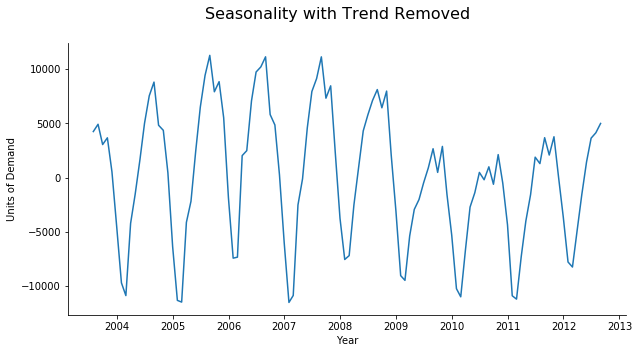

In [7]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
ax.plot(df_const['R1'])
fig.suptitle("Seasonality with Trend Removed", fontsize='16')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_const['R1'])/len(df_const))

### The seasonality is shown above with the overall trend removed.

In [8]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_const['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8250475036301713
Correlation, lag  2     0.4820939752221447
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.29310582259154694
Correlation, lag  5     -0.5386625150984725
Correlation, lag  6     -0.6496282831082484
Correlation, lag  7     -0.549838477475518
Correlation, lag  8     -0.3185413831731613
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.41176952584284515
Correlation, lag  11     0.7322731003955263
Correlation, lag  12     0.8944851710984221
Correlation, lag  13     0.7299213692607464
Correlation, lag  14     0.4055214152186815
Correlation, lag  15     0.0031237974667481893
Correlation, lag  16     -0.34159925855108353
Correlation, lag  17     -0.5745510163732713
Correlation, lag  18     -0.681216824190257
Correlation, lag  19     -0.5902172854543253
Correlation, lag  20     -0.37531995989940625
Correlation, lag  21     -0.04750388422754723
Correlation, lag  22     0.3369494305895757
Correlation, lag  23   

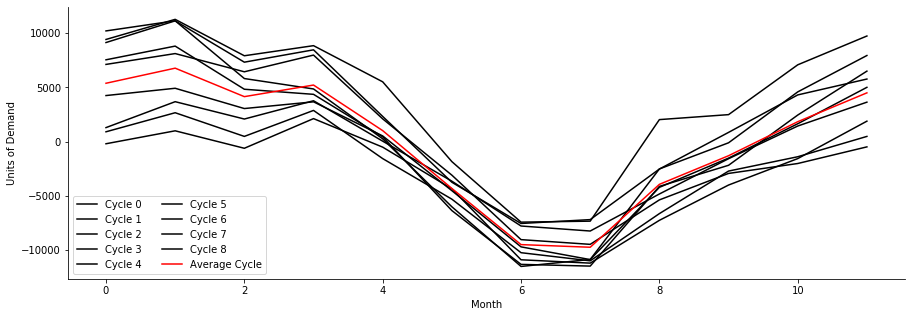

In [9]:
period = 12
cycleLen = period
numCycles = int(len(df_const)/cycleLen + 0.5)
cycles = [df_const.iloc[range(i*period,min((i+1)*period,len(df_const)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_const.iloc[range(i,len(df_const['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='lower left', ncol = 2)

### In the chart above, the 12 month cycles are overlayed to highlight the uniformity of each period, with the average cycle mostly in the middle.

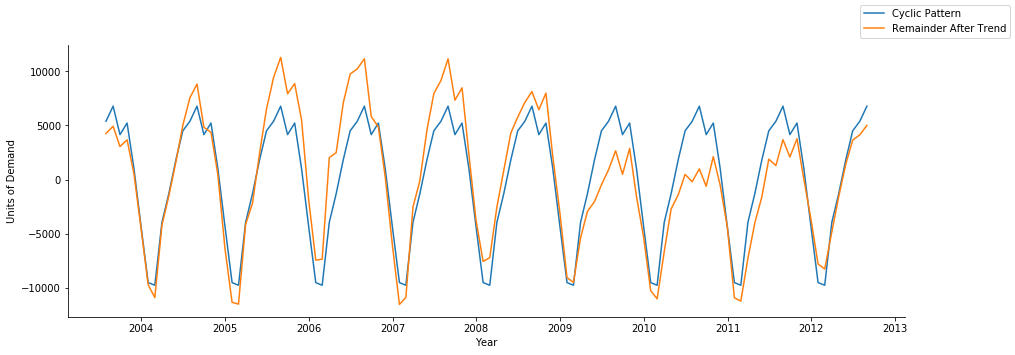

In [10]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_const)/cycleLen + 0.5)
df_const['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_const)):
    df_const.loc[df_const.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['C'],label='Cyclic Pattern')
ax.plot(df_const['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.037815969902102356
            Month  Month-Year  Total Construction  Private Construction  \
2003-07-31     19  Jul-1-2003               82971                 62216   
2003-08-31     20  Aug-1-2003               85191                 63234   
2003-09-30     21  Sep-1-2003               83841                 61767   
2003-10-31     22  Oct-1-2003               83133                 62813   
2003-11-30     23  Nov-1-2003               77915                 60115   
2003-12-31     24  Dec-1-2003               71050                 55584   
2004-01-31     25  Jan-1-2004               64934                 50975   
2004-02-29     26  Feb-1-2004               64138                 50449   
2004-03-31     27  Mar-1-2004               73238                 57796   
2004-04-30     28  Apr-1-2004               78354                 61177   
2004-05-31     29  May-1-2004               83736                 65027   
2004-06-30     30  Jun-1-2004               89932              

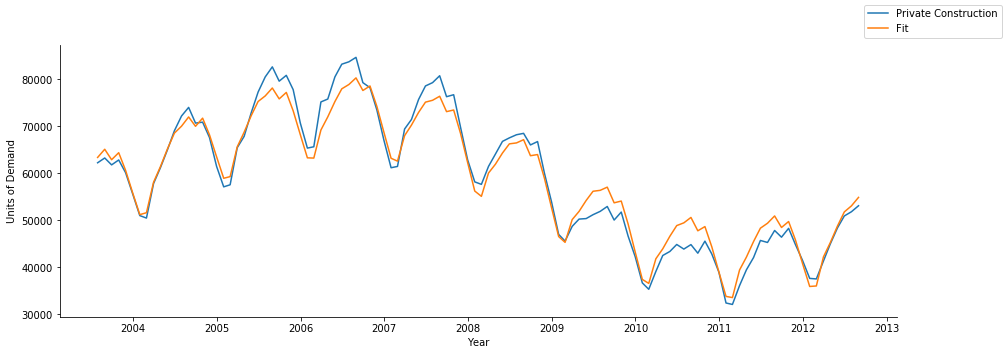

In [11]:
df_const['R2'] = df_const['R1'] - df_const['C']
df_const['R2Error'] = abs(df_const['R2']/df_const['Private Construction'])
df_const['fit'] = df_const['MovAvg'] + df_const['C']
df_const.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_const['R2Error'])/len(df_const))
print(df_const)
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['Private Construction'],label='Private Construction')
ax.plot(df_const['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     0.9027847832948318
Correlation, lag  2     0.7955702460094589
Correlation, lag  3     0.6560564735350041
Correlation, lag  4     0.5316739965331645
Correlation, lag  5     0.40216413631183895
Correlation, lag  6     0.3295267465640479
Correlation, lag  7     0.30585196484336047
Correlation, lag  8     0.330740986282625
Correlation, lag  9     0.3513528536369925
Correlation, lag  10     0.39197130708064265
Correlation, lag  11     0.42152079795616615
Correlation, lag  12     0.45317295658989853
Correlation, lag  13     0.39968224552326453
Correlation, lag  14     0.35553340791809884
Correlation, lag  15     0.2609189789415448
Correlation, lag  16     0.19032184469495012
Correlation, lag  17     0.12087743508505222
Correlation, lag  18     0.09559969424180809
Correlation, lag  19     0.09972184559354913
Correlation, lag  20     0.11683883938478473
Correlation, lag  21     0.12449790662917444
Correlation, lag  22     0.1325196757849622
Correlation, lag  23     0.13

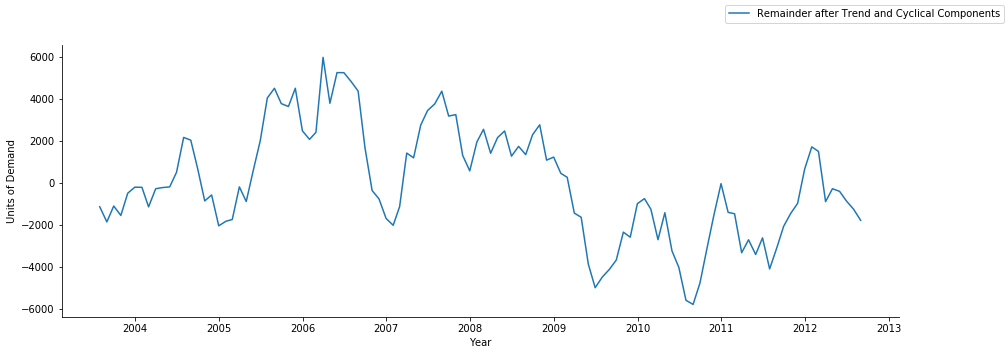

In [12]:
fig,ax = plt.subplots()
ax.plot(df_const['R2'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15,5)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_const['R2'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

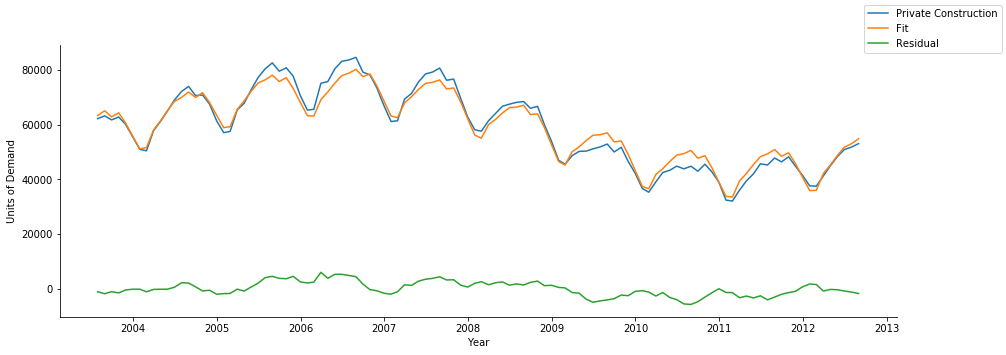

In [13]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['Private Construction'],label='Private Construction')
ax.plot(df_const['fit'],label='Fit')
ax.plot(df_const['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

### The residual is very close to random, which indicates the trend and seasonality were isolated correctly.

In [14]:
for a in [0.1 * i for i in range(1,20)]:
    df_const['aC'] = a*df_const['C']
    df_const['R3'] = df_const['R1'] - df_const['aC']
    df_const['sqErr'] = df_const['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df_const['sqErr']))

Squared Error for a = 0.1 : 3474835029.9367394
Squared Error for a = 0.2 : 2903377036.055973
Squared Error for a = 0.3 : 2399149394.396475
Squared Error for a = 0.4 : 1962152104.958241
Squared Error for a = 0.5 : 1592385167.741274
Squared Error for a = 0.6 : 1289848582.745575
Squared Error for a = 0.7 : 1054542349.9711412
Squared Error for a = 0.8 : 886466469.417975
Squared Error for a = 0.9 : 785620941.0860746
Squared Error for a = 1.0 : 752005764.9754412
Squared Error for a = 1.1 : 785620941.0860747
Squared Error for a = 1.2 : 886466469.417975
Squared Error for a = 1.3 : 1054542349.9711417
Squared Error for a = 1.4 : 1289848582.7455754
Squared Error for a = 1.5 : 1592385167.7412746
Squared Error for a = 1.6 : 1962152104.9582412
Squared Error for a = 1.7 : 2399149394.3964753
Squared Error for a = 1.8 : 2903377036.0559735
Squared Error for a = 1.9 : 3474835029.936742


# Public Construction

In [15]:
df_const = pd.read_csv('C:\\Grad\Competing Through Business Analytics\\M3\\ConstructionTimeSeriesDataV2.csv')

df_const['Month-Year'] = [x.replace("-", "-1-20") for x in df_const['Month-Year']]; df_const['Month-Year']

0      Jan-1-2002
1      Feb-1-2002
2      Mar-1-2002
3      Apr-1-2002
4      May-1-2002
5      Jun-1-2002
6      Jul-1-2002
7      Aug-1-2002
8      Sep-1-2002
9      Oct-1-2002
10     Nov-1-2002
11     Dec-1-2002
12     Jan-1-2003
13     Feb-1-2003
14     Mar-1-2003
15     Apr-1-2003
16     May-1-2003
17     Jun-1-2003
18     Jul-1-2003
19     Aug-1-2003
20     Sep-1-2003
21     Oct-1-2003
22     Nov-1-2003
23     Dec-1-2003
24     Jan-1-2004
25     Feb-1-2004
26     Mar-1-2004
27     Apr-1-2004
28     May-1-2004
29     Jun-1-2004
          ...    
116    Sep-1-2011
117    Oct-1-2011
118    Nov-1-2011
119    Dec-1-2011
120    Jan-1-2012
121    Feb-1-2012
122    Mar-1-2012
123    Apr-1-2012
124    May-1-2012
125    Jun-1-2012
126    Jul-1-2012
127    Aug-1-2012
128    Sep-1-2012
129    Oct-1-2012
130    Nov-1-2012
131    Dec-1-2012
132    Jan-1-2013
133    Feb-1-2013
134    Mar-1-2013
135    Apr-1-2013
136    May-1-2013
137    Jun-1-2013
138    Jul-1-2013
139    Aug-1-2013
140    Sep

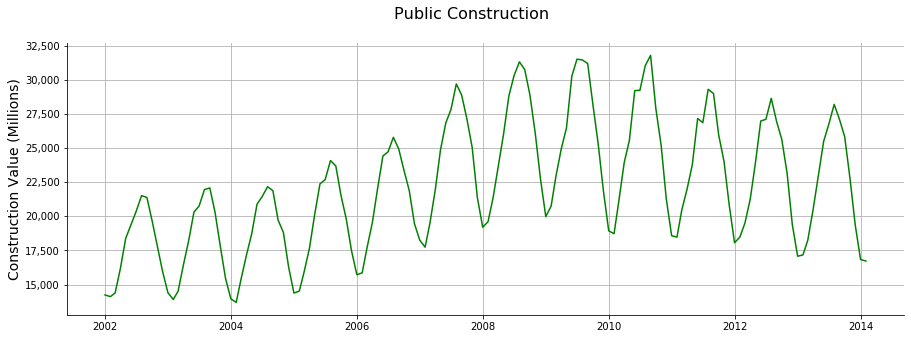

In [16]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(df_const['Month-Year']), df_const['Public Construction'],color='green')
ax.yaxis.set_label_text('Construction Value (Millions)', fontsize='14')
fig.suptitle("Public Construction", fontsize='16')
fig.set_size_inches(15,5)
ax.grid(True)
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### In the chart above, a long term nonlinear trend is present, although much less pronounced than in the private construction data, as well as strong seasonality.

C:\Users\ws0140\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  import sys


Average Squared Error per Month:  13581548.10100133
            Month  Month-Year  Total Construction  Private Construction  \
2003-07-31     19  Jul-1-2003               82971                 62216   
2003-08-31     20  Aug-1-2003               85191                 63234   
2003-09-30     21  Sep-1-2003               83841                 61767   
2003-10-31     22  Oct-1-2003               83133                 62813   
2003-11-30     23  Nov-1-2003               77915                 60115   
2003-12-31     24  Dec-1-2003               71050                 55584   
2004-01-31     25  Jan-1-2004               64934                 50975   
2004-02-29     26  Feb-1-2004               64138                 50449   
2004-03-31     27  Mar-1-2004               73238                 57796   
2004-04-30     28  Apr-1-2004               78354                 61177   
2004-05-31     29  May-1-2004               83736                 65027   
2004-06-30     30  Jun-1-2004               8993

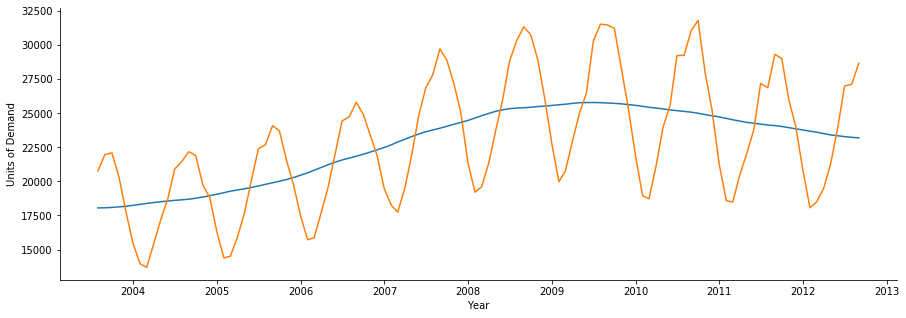

In [17]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2
    
df_const['MovAvg'] = np.NaN
df_const['sqErr'] = np.NaN
# Chaging the DataFrame index to DatetimeIndex data type is required for using one of the functions below
df_const.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002, month=1, day=1), periods = len(df_const['Public Construction']))
#print(len(data),'\n',data)

window = 36

window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is eing computed
for i in range(int(window/2),df_const.shape[0]-int(window/2)):
    df_const.loc[df_const.index[i],'MovAvg'] = (0.5*df_const.iloc[i - int(window/2)]['Public Construction'] + df_const.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df_const.iloc[i + int(window/2)]['Public Construction'])/float(window)

df_const['sqErr'] = (df_const['Public Construction'] - df_const['MovAvg'])**2
# The squared error can eb computed also with the dfHA.apply() method below
# Using dfHS.apply() in this case is unecessary complexity, but it is a good function to know about
#dfHS['sqErr'] = dfHS.apply(sqErr,axis='columns')

# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df_const.dropna(how='any',inplace=True)

fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['MovAvg'],label='Moving Avg.')
ax.plot(df_const['Public Construction'],label='Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ',sum(df_const['sqErr'])/len(df_const))
print(df_const)

### The trend in the data is isolated in the blue line above.

In [18]:
df_const['R1'] = df_const['Public Construction'] - df_const['MovAvg']
df_const['R1Error'] = abs((df_const['Public Construction'] - df_const['R1'])/df_const['Public Construction'])
df_const.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

Average Residual:  120.58522727272724


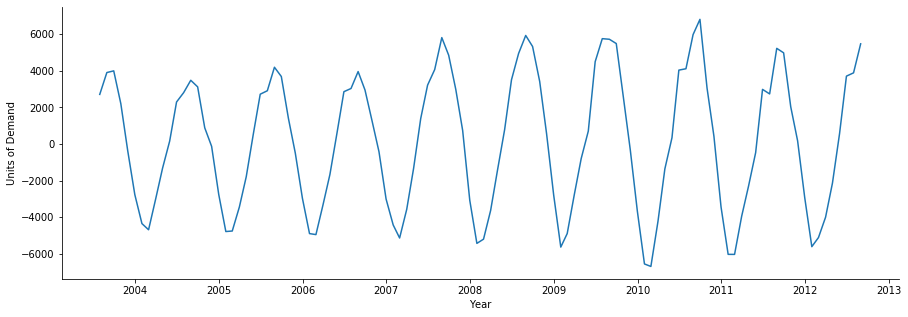

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_const['R1'])/len(df_const))

### The seasonality is shown above with the overall trend removed.

In [20]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_const['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8486375316894602
Correlation, lag  2     0.4846195337567183
Correlation, lag  3     -0.007177248780703143
Correlation, lag  4     -0.49554892375973447
Correlation, lag  5     -0.8288179569669593
Correlation, lag  6     -0.9462777407123573
Correlation, lag  7     -0.8288579638039721
Correlation, lag  8     -0.48571061970010343
Correlation, lag  9     0.004997098591155971
Correlation, lag  10     0.4817646196968951
Correlation, lag  11     0.8389178942275625
Correlation, lag  12     0.9802446550357118
Correlation, lag  13     0.8361843883266434
Correlation, lag  14     0.4848265284305894
Correlation, lag  15     -0.003592213269114516
Correlation, lag  16     -0.48222336701850393
Correlation, lag  17     -0.8171150144686051
Correlation, lag  18     -0.9427534781166457
Correlation, lag  19     -0.8337051906400711
Correlation, lag  20     -0.4961430024835644
Correlation, lag  21     -0.009858447978117565
Correlation, lag  22     0.4684416329134112
Correlation, lag 

### As expected, lag 12 has the maximum correlation.

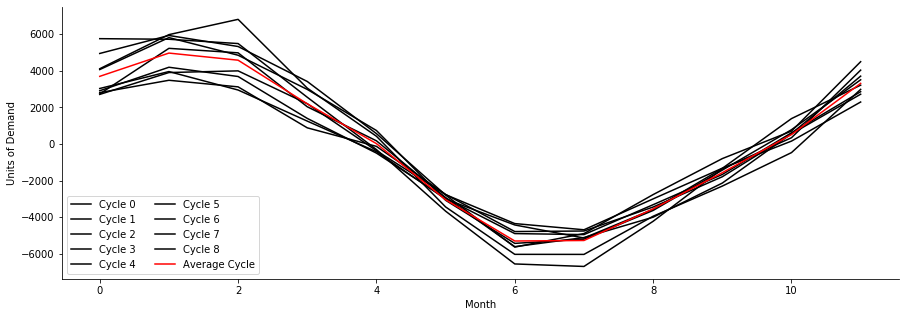

In [21]:
period = 12
cycleLen = period
numCycles = int(len(df_const)/cycleLen + 0.5)
cycles = [df_const.iloc[range(i*period,min((i+1)*period,len(df_const)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_const.iloc[range(i,len(df_const['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='lower left', ncol = 2)

### The overlayed cycles above show a strong similarity with each other due to the more predictable nature of public spending.

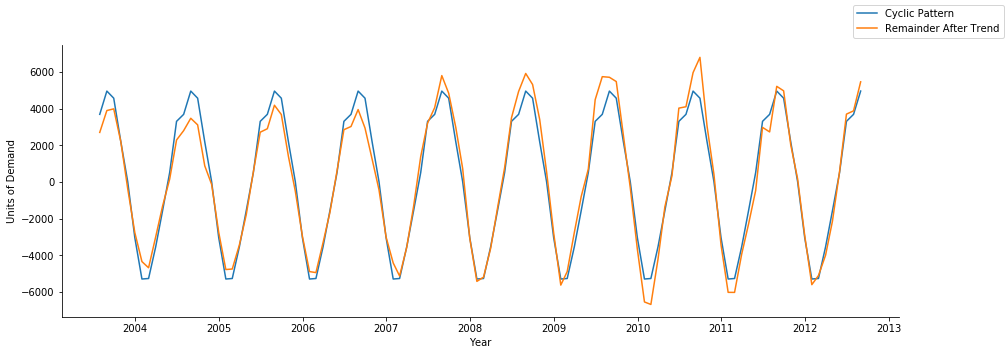

In [22]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(df_const)/cycleLen + 0.5)
df_const['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_const)):
    df_const.loc[df_const.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['C'],label='Cyclic Pattern')
ax.plot(df_const['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.024999478035219624
            Month  Month-Year  Total Construction  Private Construction  \
2003-07-31     19  Jul-1-2003               82971                 62216   
2003-08-31     20  Aug-1-2003               85191                 63234   
2003-09-30     21  Sep-1-2003               83841                 61767   
2003-10-31     22  Oct-1-2003               83133                 62813   
2003-11-30     23  Nov-1-2003               77915                 60115   
2003-12-31     24  Dec-1-2003               71050                 55584   
2004-01-31     25  Jan-1-2004               64934                 50975   
2004-02-29     26  Feb-1-2004               64138                 50449   
2004-03-31     27  Mar-1-2004               73238                 57796   
2004-04-30     28  Apr-1-2004               78354                 61177   
2004-05-31     29  May-1-2004               83736                 65027   
2004-06-30     30  Jun-1-2004               89932              

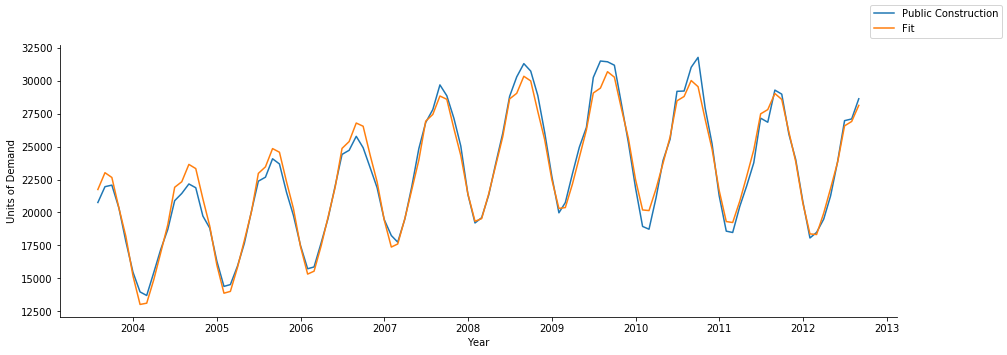

In [23]:
df_const['R2'] = df_const['R1'] - df_const['C']
df_const['R2Error'] = abs(df_const['R2']/df_const['Public Construction'])
df_const['fit'] = df_const['MovAvg'] + df_const['C']
df_const.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_const['R2Error'])/len(df_const))
print(df_const)
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['Public Construction'],label='Public Construction')
ax.plot(df_const['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag  1     0.7155376451059173
Correlation, lag  2     0.46852253106604014
Correlation, lag  3     0.25515329726845276
Correlation, lag  4     -0.04701265334308256
Correlation, lag  5     -0.22016658790924398
Correlation, lag  6     -0.3132037721816348
Correlation, lag  7     -0.36128568452449933
Correlation, lag  8     -0.24373155996028426
Correlation, lag  9     0.013438618980204611
Correlation, lag  10     0.15965347522586698
Correlation, lag  11     0.38319034802866925
Correlation, lag  12     0.49428131134552267
Correlation, lag  13     0.40155433656190537
Correlation, lag  14     0.4013822541976087
Correlation, lag  15     0.2147075593569968
Correlation, lag  16     0.02213940772746595
Correlation, lag  17     -0.06500065931091231
Correlation, lag  18     -0.17184421045579068
Correlation, lag  19     -0.21271212196110678
Correlation, lag  20     -0.11859857289185519
Correlation, lag  21     -0.05056769990615314
Correlation, lag  22     0.018257128661801573
Correlation

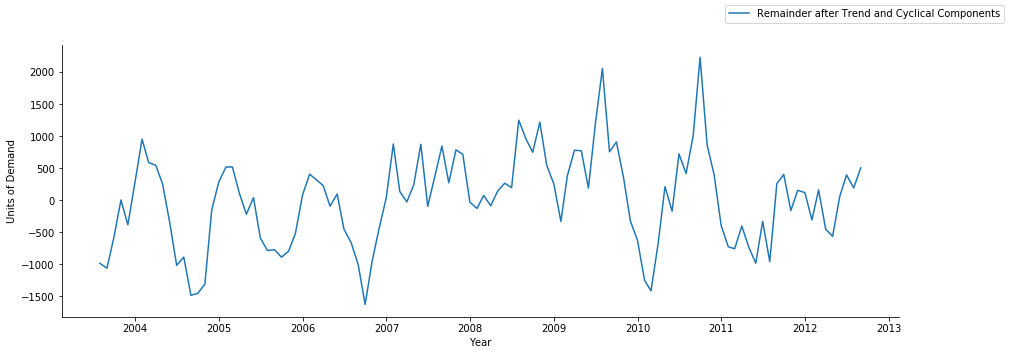

In [24]:
fig,ax = plt.subplots()
ax.plot(df_const['R2'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(15,5)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_const['R2'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

### The residual data after all trend and cyclicality have been removed.

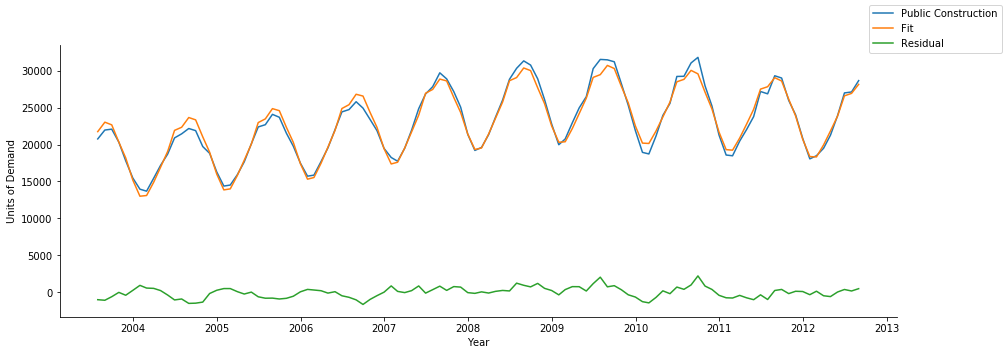

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
ax.plot(df_const['Public Construction'],label='Public Construction')
ax.plot(df_const['fit'],label='Fit')
ax.plot(df_const['R2'],label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [26]:
for a in [0.1 * i for i in range(1,20)]:
    df_const['aC'] = a*df_const['C']
    df_const['R3'] = df_const['R1'] - df_const['aC']
    df_const['sqErr'] = df_const['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(df_const['sqErr']))

Squared Error for a = 0.1 : 1220928713.5738468
Squared Error for a = 0.2 : 976628354.7255788
Squared Error for a = 0.3 : 761069214.5653421
Squared Error for a = 0.4 : 574251293.0931371
Squared Error for a = 0.5 : 416174590.30896336
Squared Error for a = 0.6 : 286839106.2128214
Squared Error for a = 0.7 : 186244840.80471107
Squared Error for a = 0.8 : 114391794.08463214
Squared Error for a = 0.9 : 71279966.05258486
Squared Error for a = 1.0 : 56909356.70856909
Squared Error for a = 1.1 : 71279966.05258493
Squared Error for a = 1.2 : 114391794.08463229
Squared Error for a = 1.3 : 186244840.80471113
Squared Error for a = 1.4 : 286839106.2128216
Squared Error for a = 1.5 : 416174590.3089634
Squared Error for a = 1.6 : 574251293.0931373
Squared Error for a = 1.7 : 761069214.5653428
Squared Error for a = 1.8 : 976628354.725579
Squared Error for a = 1.9 : 1220928713.5738468
